In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from math import cos

In [40]:
# Lade die Daten aus der CSV Datei:
# Da die Datei eine CSV Datei mit ";" Trennzeichen ist, muss der Seperator angegeben werden, 
# Da die Daten keinen Header haben, wird das Keyword header=None angegeben
# Außerdem sind die Daten in der Ersten Zeile unsere "x"- Werte, also kann man sie Anschaulich zu einem Index machen
df = pd.read_csv("test_data_1.csv", sep = ";", index_col = 0, header = None)
df.head()

,1
0,
0.000000,1.158148
0.008002,0.585141
0.016003,0.902878
0.024005,0.852134
0.032006,0.842759


In [41]:
# Als nächstes wollen wir die Daten als ein np.array haben, dabei ist "0" der Name der Spalte
xdata = np.array(df.index)
ydata = np.array(df[1])

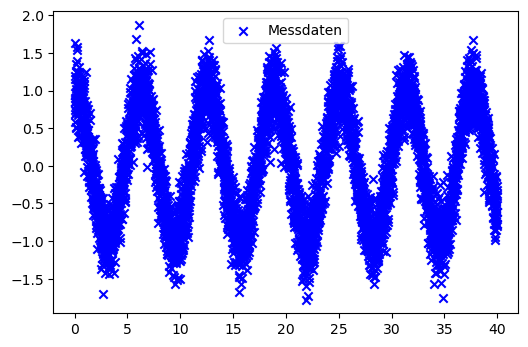

In [42]:
# Plote die Daten, um eine Idee zu bekommen, was für eine Funktion passen könnte
fig = plt.figure(dpi = 100)

# Für die verschiedenen Plot Arten, gibt es jede Menge verschiedenen Farben, Markertypen
# die Farbe wird hinter dem Keyword c= angegeben, der Markertyp hinter dem Keyword marker=
# Wenn man die Daten beschrifften möchte, kann man ein label= festlegen. Damit das label 
# angezeigt wird, muss man allerdings noch plt.legend() aufrufen
plt.scatter(xdata, ydata, marker = "x", c = "b",  label = "Messdaten")
plt.legend()
plt.show()

In [43]:
# Definiere Eine Funktion, die Auf die Funktionale Form der Daten passen könnte:
# Wichtig ist, dass das erste Argument die Laufvariable ist, und nicht ein Parameter
def func(x, a, b, c, d):
    return a*np.cos(b*x + c) + d 

In [46]:
# Führe den Fit durch, Nach dem Fit stecken die Informationen über die Paramterer in popt, in der Reihenfolge, in der sie als
# Argumente für die Funktion f definiert wurden
# in pcov steckt die Covarianz der Parameter, was für die Fehlerrechnung wichtig werden kann
popt, pcov, info, mesg, ler = curve_fit(func, xdata, ydata, full_output=True)

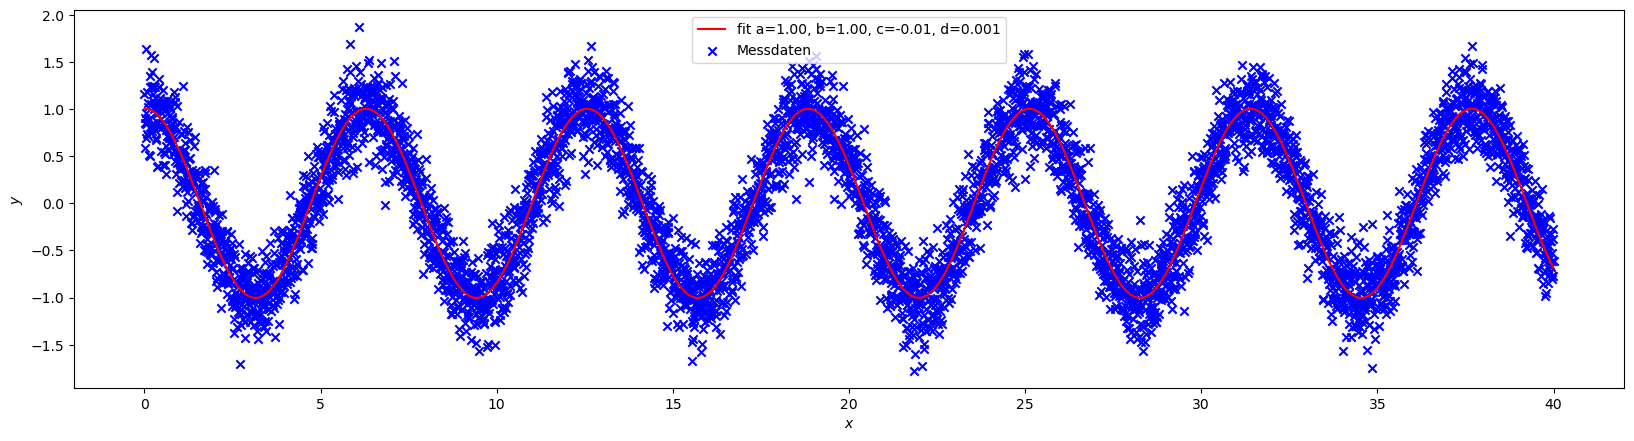

In [45]:
# Plotte die Daten und den Fit
fig = plt.figure(dpi = 100, figsize = (20, 5))
plt.plot(xdata, func(xdata, *popt), c="r", label = f"fit a={popt[0]:.2f}, b={popt[1]:.2f}, c={popt[2]:.2f}, d={popt[3]:.3f}")
plt.scatter(xdata, ydata, label = "Messdaten", marker = "x", c="b")
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.legend()